In [20]:
import numpy as np
import pandas as pd
import math
from scipy import stats 
from IPython.display import display
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
#Генерируем выборку из 1000 значений случайной величины, имеющей равномерное распределение на отрезке  [a,b] :
a = 1
b = 4
n_sub_samples=1000
uniform_rv = stats.uniform(a, b-a)
sample_uniform=uniform_rv.rvs(n_sub_samples)
x = np.linspace(0,5,100)
pdf = uniform_rv.pdf(x)

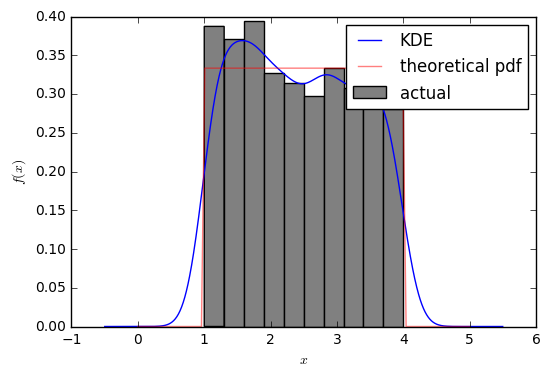

In [32]:
#Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:
df = pd.DataFrame(sample_uniform, columns=['KDE'])
ax = df.plot(kind='density')
# на том же графике построим теоретическую плотность распределения:
plt.plot(x, pdf, label='theoretical pdf',c='r',alpha=0.5)
plt.hist(sample_uniform,normed=True,color='grey',label='actual')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

In [30]:
#Будем из этой случайной величины брать выборку объема n=5,10,50 и 
#считать по этой выборке выборочное среднее, записывать это полученное значение. 
#Повторим этот эксперимент 1000 раз
#Построим графики для трех вариантов объемов выборки
N = [5, 10, 50]


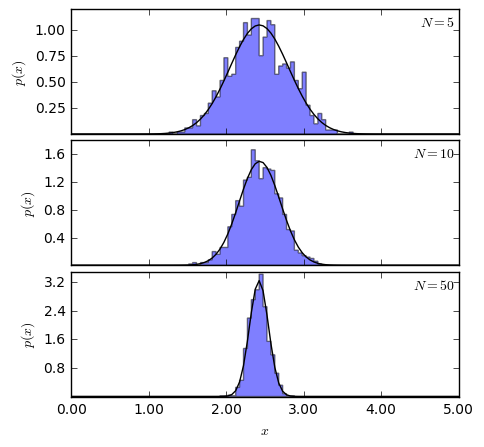

In [31]:
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(hspace=0.05)

for i in range(len(N)):
    ax = fig.add_subplot(3, 1, i + 1)
    means = []
    for j in range(n_sub_samples):
        sub_sample = sample_uniform[np.random.randint(0,len(sample_uniform),N[i])]
        means.append(np.mean(sub_sample))
 
    # гистограмма среднего по выборки
    ax.hist(means, bins=np.linspace(0, 5, 100),
            histtype='stepfilled', alpha=0.5, normed=True)
 
    # моделирующее нормальное распределение
    mu = np.mean(means)
    sigma = np.std(means,ddof=1)
    dist = norm(mu, sigma)
    
    x_pdf = np.linspace(0, 5, 100)
    ax.plot(x_pdf, dist.pdf(x_pdf), '-k')

    ax.set_xlim(0.0, 5.0)
    ax.set_ylim(0.001, None)

    ax.xaxis.set_major_locator(plt.MultipleLocator(1.0))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

    ax.text(0.99, 0.95, r"$N = %i$" % N[i],
            ha='right', va='top', transform=ax.transAxes)

    if i == len(N) - 1:
        ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
        ax.set_xlabel(r'$x$')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylabel('$p(x)$')

plt.show()


Выводы :
1.Пусть есть случайная величина X из некоторого практически любого распределения и есть выборка объема n из нее, тогда выборочное среднее, построенное по этой выборке, можно приблизить нормальным распределением со средним значением, которое совпадает с математическим ожиданием исходной случайной величины и с дисперсией, которая равна дисперсии исходной случайной величины, поделенной на n. 
2.Чем больше n, тем точнее эта нормальная аппроксимация, тем лучшее распределение описывается нормальным. 
Этот результат справедлив не только для непрерывных распределений, но и для дискретных. 
3.В примере приводится распределение выборочных средних, построенное по выборкам объемам 5, 10, 50. С увеличением n hаспределение становится все более и более гладким и все более и более похожим на нормальное. Это доказывает, что центральная предельная теорема работает.